In [1]:
# Use the RSI ( Relative Strength Index) with PYTHON to determine if the stock is oversold or Oversold.


In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# OK, import the csv file
# dataset = pd.read_csv('../rsi_trading/DATA/apple_share_price.csv', usecols=[0,1,2,3,4,5,6], index_col='Date', parse_dates=True,infer_datetime_format=True)
# index by date. sort by week.

In [4]:
# Display the data
#dataset.head()

In [12]:
# Lets save the dataset locally in this folder AND remove the redundency in code. We will # out the previous code to show our work.
# dataset.to_csv('AAPL.csv')

#Cool. A csv file pops up in the folder which you are working in. Now lets ask the comp to open the new file and we can work from there. 
AAPL = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True,infer_datetime_format=True)


In [13]:
# Display AAPL dataset
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.997803,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.592697,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,126.196747,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.502991,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.629379,105158200


In [14]:
AAPL.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

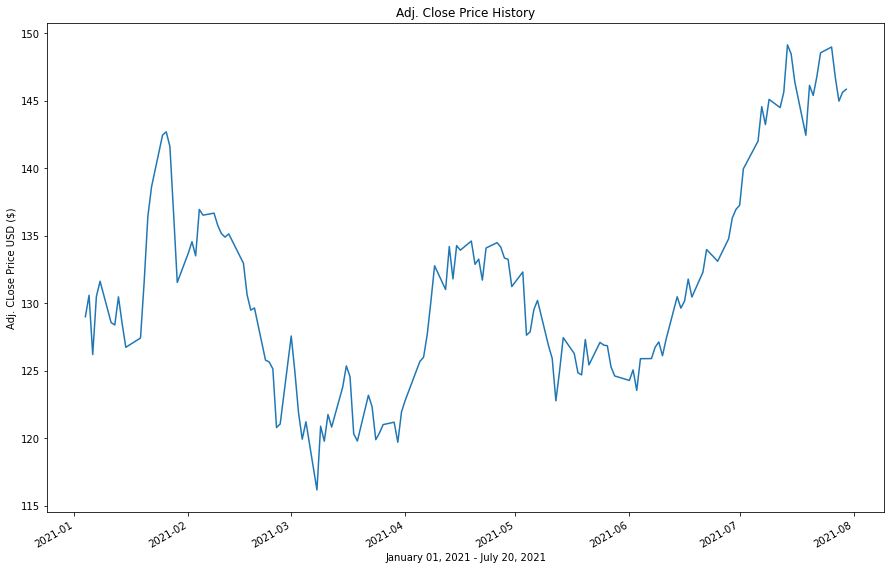

In [15]:
AAPL['Adj Close'].plot(figsize=(15,10), 
                       title='Adj. Close Price History',
                       xlabel='January 01, 2021 - July 20, 2021',
                       ylabel='Adj. CLose Price USD ($)');

In [16]:
# Prepare data to calculate the RSI by calculating the difference in price.
delta = AAPL['Adj Close'].diff(1)
delta 

Date
2021-01-04         NaN
2021-01-05    1.594894
2021-01-06   -4.395950
2021-01-07    4.306244
2021-01-08    1.126388
                ...   
2021-07-26    0.430007
2021-07-27   -2.220001
2021-07-28   -1.790008
2021-07-29    0.660003
2021-07-30    0.220002
Name: Adj Close, Length: 145, dtype: float64

In [17]:
# Remove Nan Values 
delta = delta.dropna()
delta

Date
2021-01-05    1.594894
2021-01-06   -4.395950
2021-01-07    4.306244
2021-01-08    1.126388
2021-01-11   -3.060211
                ...   
2021-07-26    0.430007
2021-07-27   -2.220001
2021-07-28   -1.790008
2021-07-29    0.660003
2021-07-30    0.220002
Name: Adj Close, Length: 144, dtype: float64

In [18]:
# Get Positive Gains (up) and Negative gains (down)
up = delta.copy()
down = delta.copy()
up[up<0]= 0
down[down > 0] = 0

In [19]:
# get the time period you want to contabulate TEAM decided 5 days
period = 5

# Calculate the average gain and the average loss
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

In [26]:
# Formula to Calculate the RSI 
# STEP 1 calculate the RS
rs = avg_gain / avg_loss

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + rs))


In [27]:
# Display the RSI; TEAM did not want this info code removed

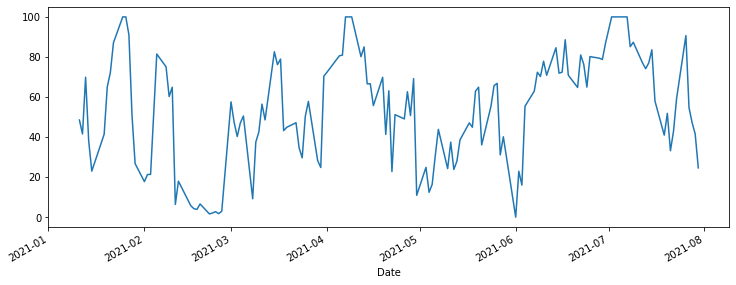

In [28]:
# Display RSI VISUALLy
plt.figure(figsize=(12.2,  4.5))
RSI.plot();

In [34]:
# Display all RSI indicators for Analysis
# Create new Dataframe
new_df =pd.DataFrame()
new_df['Adj Close'] = AAPL['Adj Close']
new_df["RSI"] = RSI

In [35]:
new_df.head(5)

,Adj Close,RSI
Date,,
2021-01-04,128.997803,NaN
2021-01-05,130.592697,NaN
2021-01-06,126.196747,NaN
2021-01-07,130.502991,NaN
2021-01-08,131.629379,NaN


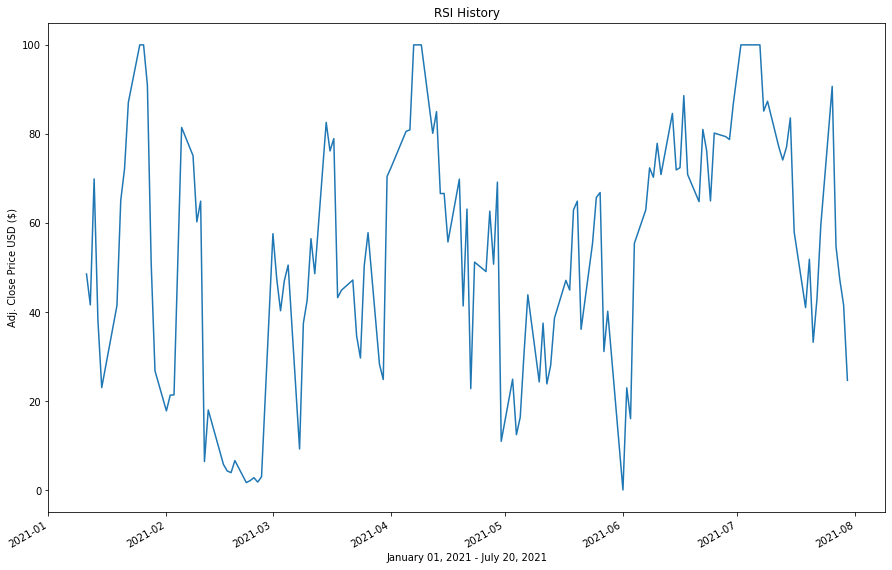

In [37]:
# Display visually show the adj close and rsi
#Plot the adj close price 
new_df['RSI'].plot(figsize=(15,10), 
                       title='RSI History',
                       xlabel='January 01, 2021 - July 20, 2021',
                       ylabel='Adj. Close Price USD ($)');


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

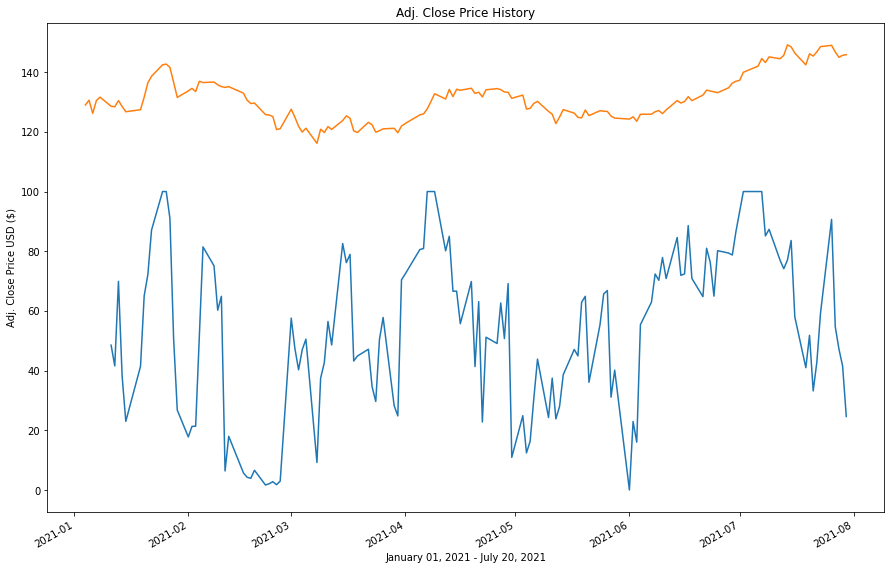

In [39]:
# Lets Plot the Corresponding RSI values and the significant levels
new_df['RSI'].plot(figsize=(15,10), 
                       title='RSI History',
                       xlabel='January 01, 2021 - July 20, 2021',
                       ylabel='Adj. Close Price USD ($)')


# SIGNIFICANT LEVELS
####TRYING TO PLOT THE RSI INDICATORS 70/30, 80/20, 90/10
#new_df.hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', data=None, **kwargs)
#axhline.plot(x,x+1,c='g',marker=(8,2,0),ls='--',label='70/30')
#axhline.plot(x,(x+1)**2,c='k',ls='-',label='80/20')
#axhline.plot(x,(x-1)**2,c='r',marker="v",ls='-',label=90/10)
#axhline.plot(x,x**2-1,c='m',marker="o",ls='--',label='KSTW',fillstyle='none')
#axhline.plot(x,x-1,c='k',marker="+",ls=':',label='DGYC')
 
#plt.legend(loc=2)
#plt.show()

 


AAPL['Adj Close'].plot(figsize=(15,10), 
                       title='Adj. Close Price History',
                       xlabel='January 01, 2021 - July 20, 2021',
                       ylabel='Adj. Close Price USD ($)');

